# Codificacion del conjunto limpio

Luego de una revisión de los datos previamente limpiados se concluyo en que se deben categorizar las columnas fecha y eliminar la columna cedula que no le aportara informacion relevante al algoritmo de clustering y puede dar lugar a ruido

In [ ]:
# Imports basicos
import pandas as pd
import numpy as np
import pickle

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Leer el DF con las fechas categorizadas
df = pd.read_csv('datalimpia_2.csv')

In [ ]:
df

,Fecha registro,Show,Total Boletos,Nombre Localidad,Forma de Pago,Estado de Pago,FechaShow,EsCompartido,TipoShow,Mes,Día,Periodo,Mes_Show,Día_Show,Periodo_Show
0,2024-01-25 16:23:31,TARDE CLIPP,1,SALA 3,Wallet,1,2024-03-01 15:00:00,1,Otro,Enero,Jueves,Tarde,Marzo,Viernes,Tarde
1,2024-01-25 16:15:41,TARDE CLIPP,2,SALA 3,Wallet,1,2024-03-01 15:00:00,0,Otro,Enero,Jueves,Tarde,Marzo,Viernes,Tarde
2,2024-01-25 16:15:30,TARDE CLIPP,1,SALA 3,Wallet,1,2024-03-01 15:00:00,1,Otro,Enero,Jueves,Tarde,Marzo,Viernes,Tarde
3,2024-01-25 16:13:18,TARDE CLIPP,1,SALA 3,Wallet,1,2024-03-01 15:00:00,1,Otro,Enero,Jueves,Tarde,Marzo,Viernes,Tarde
4,2024-01-25 16:10:37,TARDE CLIPP,1,SALA 3,Wallet,1,2024-03-01 15:00:00,1,Otro,Enero,Jueves,Tarde,Marzo,Viernes,Tarde
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15984,2024-11-08 17:23:46,Anemoi,2,PALCO,AppExterna,1,2024-11-21 20:00:00,0,Teatro,Noviembre,Viernes,Tarde,Noviembre,Jueves,Noche
15985,2024-11-08 17:23:11,Cuarteto de Saxofon y Sinfonica Philip Glass,2,PLATEA MEDIA,AppExterna,1,2024-11-15 20:00:00,1,Concierto,Noviembre,Viernes,Tarde,Noviembre,Viernes,Noche
15986,2024-11-08 17:22:30,Un hombre muerto a puntapies,2,PLATEA BAJA,AppExterna,1,2024-11-18 20:00:00,0,Teatro,Noviembre,Viernes,Tarde,Noviembre,Lunes,Noche
15987,2024-11-08 17:17:57,A pebble falling on a silent lake,2,PLATEA MEDIA,AppExterna,1,2024-11-16 20:00:00,0,Teatro,Noviembre,Viernes,Tarde,Noviembre,Sábado,Noche


In [ ]:
# Eliminar las columnas con fechas completas
df_mod = df.drop(['Fecha registro', 'FechaShow'], axis=1)

In [ ]:
df_mod

,Show,Total Boletos,Nombre Localidad,Forma de Pago,Estado de Pago,EsCompartido,TipoShow,Mes,Día,Periodo,Mes_Show,Día_Show,Periodo_Show
0,TARDE CLIPP,1,SALA 3,Wallet,1,1,Otro,Enero,Jueves,Tarde,Marzo,Viernes,Tarde
1,TARDE CLIPP,2,SALA 3,Wallet,1,0,Otro,Enero,Jueves,Tarde,Marzo,Viernes,Tarde
2,TARDE CLIPP,1,SALA 3,Wallet,1,1,Otro,Enero,Jueves,Tarde,Marzo,Viernes,Tarde
3,TARDE CLIPP,1,SALA 3,Wallet,1,1,Otro,Enero,Jueves,Tarde,Marzo,Viernes,Tarde
4,TARDE CLIPP,1,SALA 3,Wallet,1,1,Otro,Enero,Jueves,Tarde,Marzo,Viernes,Tarde
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15984,Anemoi,2,PALCO,AppExterna,1,0,Teatro,Noviembre,Viernes,Tarde,Noviembre,Jueves,Noche
15985,Cuarteto de Saxofon y Sinfonica Philip Glass,2,PLATEA MEDIA,AppExterna,1,1,Concierto,Noviembre,Viernes,Tarde,Noviembre,Viernes,Noche
15986,Un hombre muerto a puntapies,2,PLATEA BAJA,AppExterna,1,0,Teatro,Noviembre,Viernes,Tarde,Noviembre,Lunes,Noche
15987,A pebble falling on a silent lake,2,PLATEA MEDIA,AppExterna,1,0,Teatro,Noviembre,Viernes,Tarde,Noviembre,Sábado,Noche


# Codificacion

## Escalar columnas numericas

Le aplicaremos escalado con *MinMaxScaler* unicamente a la columna categórica **Total Boletos** puesto que es la única que no posee una clasifcación con valores binarios como lo hace el resto y lo que hace que no sea necesario aplicarles un escalado

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_prep = df_mod.copy()
df_prep['Total Boletos'] = scaler.fit_transform(df_prep[['Total Boletos']])

# Guardar el escalador ajustado
with open('totalBoletos_scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

df_prep

,Show,Total Boletos,Nombre Localidad,Forma de Pago,Estado de Pago,EsCompartido,TipoShow,Mes,Día,Periodo,Mes_Show,Día_Show,Periodo_Show
0,TARDE CLIPP,0.000000,SALA 3,Wallet,1,1,Otro,Enero,Jueves,Tarde,Marzo,Viernes,Tarde
1,TARDE CLIPP,0.020408,SALA 3,Wallet,1,0,Otro,Enero,Jueves,Tarde,Marzo,Viernes,Tarde
2,TARDE CLIPP,0.000000,SALA 3,Wallet,1,1,Otro,Enero,Jueves,Tarde,Marzo,Viernes,Tarde
3,TARDE CLIPP,0.000000,SALA 3,Wallet,1,1,Otro,Enero,Jueves,Tarde,Marzo,Viernes,Tarde
4,TARDE CLIPP,0.000000,SALA 3,Wallet,1,1,Otro,Enero,Jueves,Tarde,Marzo,Viernes,Tarde
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15984,Anemoi,0.020408,PALCO,AppExterna,1,0,Teatro,Noviembre,Viernes,Tarde,Noviembre,Jueves,Noche
15985,Cuarteto de Saxofon y Sinfonica Philip Glass,0.020408,PLATEA MEDIA,AppExterna,1,1,Concierto,Noviembre,Viernes,Tarde,Noviembre,Viernes,Noche
15986,Un hombre muerto a puntapies,0.020408,PLATEA BAJA,AppExterna,1,0,Teatro,Noviembre,Viernes,Tarde,Noviembre,Lunes,Noche
15987,A pebble falling on a silent lake,0.020408,PLATEA MEDIA,AppExterna,1,0,Teatro,Noviembre,Viernes,Tarde,Noviembre,Sábado,Noche


In [ ]:
df_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15989 entries, 0 to 15988
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Show              15989 non-null  object
 1   Total Boletos     15989 non-null  int64 
 2   Nombre Localidad  15989 non-null  object
 3   Forma de Pago     15989 non-null  object
 4   Estado de Pago    15989 non-null  int64 
 5   EsCompartido      15989 non-null  int64 
 6   TipoShow          15989 non-null  object
 7   Mes               15989 non-null  object
 8   Día               15989 non-null  object
 9   Periodo           15989 non-null  object
 10  Mes_Show          15989 non-null  object
 11  Día_Show          15989 non-null  object
 12  Periodo_Show      15989 non-null  object
dtypes: int64(3), object(10)
memory usage: 1.6+ MB


## Codificar columnas categoricas

Vamos a codificar columnas categóricas con OneHotEncoding

In [ ]:
# Separar numericas y categoricas
df_num = df_prep.select_dtypes(exclude='object')
df_cat = df_prep.select_dtypes(include='object')

In [ ]:
df_num.head()

,Total Boletos,Estado de Pago,EsCompartido
0,0.000000,1,1
1,0.020408,1,0
2,0.000000,1,1
3,0.000000,1,1
4,0.000000,1,1


In [ ]:
df_cat.head()

,Show,Nombre Localidad,Forma de Pago,TipoShow,Mes,Día,Periodo,Mes_Show,Día_Show,Periodo_Show
0,TARDE CLIPP,SALA 3,Wallet,Otro,Enero,Jueves,Tarde,Marzo,Viernes,Tarde
1,TARDE CLIPP,SALA 3,Wallet,Otro,Enero,Jueves,Tarde,Marzo,Viernes,Tarde
2,TARDE CLIPP,SALA 3,Wallet,Otro,Enero,Jueves,Tarde,Marzo,Viernes,Tarde
3,TARDE CLIPP,SALA 3,Wallet,Otro,Enero,Jueves,Tarde,Marzo,Viernes,Tarde
4,TARDE CLIPP,SALA 3,Wallet,Otro,Enero,Jueves,Tarde,Marzo,Viernes,Tarde


In [ ]:
# Funcion para categoricas pequeñas <12
def onehot_encode_column(df, column):
    """
    Aplica OneHotEncoding a una columna categórica.
    """
    # Codificar la columna categórica usando pd.get_dummies con tipo de dato entero
    df_encoded = pd.get_dummies(df[column], prefix=column, dtype=int)
    return df_encoded

In [ ]:
_# Funcion para categoricas grandes
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

def process_large_category(dataframe, column, n_components=10):
    """
    Aplica OneHotEncoding, escalado y PCA a una columna categórica con muchas categorías.

    Args:
        dataframe (pd.DataFrame): DataFrame que contiene los datos.
        column (str): Nombre de la columna categórica.
        n_components (float o int): Porcentaje de varianza explicada (float) o número de componentes (int).

    Returns:
        pd.DataFrame: DataFrame con las nuevas columnas PCA reemplazando la original.
    """
    # Codificar la columna categórica usando OneHotEncoding
    encoded_data = pd.get_dummies(dataframe[column], prefix=column)

    # Escalar los datos codificados
    scaler = RobustScaler()
    scaled_data = scaler.fit_transform(encoded_data)

    # Aplicar PCA
    pca = PCA(n_components=n_components)
    pca_data = pca.fit_transform(scaled_data)

    # Crear un DataFrame con los resultados de PCA
    pca_columns = [f"{column} {i+1}" for i in range(pca_data.shape[1])]
    df_pca = pd.DataFrame(pca_data, columns=pca_columns, index=dataframe.index)

    return df_pca

In [ ]:
# Categoricas pequeñas
forma_pago = onehot_encode_column(df_cat, 'Forma de Pago')
tipo_show = onehot_encode_column(df_cat, 'TipoShow')
mes = onehot_encode_column(df_cat, 'Mes')
dia = onehot_encode_column(df_cat, 'Día')
periodo = onehot_encode_column(df_cat, 'Periodo')
mes_show = onehot_encode_column(df_cat, 'Mes_Show')
dia_show = onehot_encode_column(df_cat, 'Día_Show')
periodo_show = onehot_encode_column(df_cat, 'Periodo_Show')

In [ ]:
# Categoricas grandes
show = process_large_category(df_cat, 'Show', n_components=1)
nombre_localidad = process_large_category(df_cat, 'Nombre Localidad', n_components=1)

In [ ]:
# Unificarlas
df_cat_enc = pd.concat([forma_pago, tipo_show, nombre_localidad, show, dia, mes, periodo, dia_show, mes_show, periodo_show], axis=1)
df_cat_enc

,Forma de Pago_AppExterna,Forma de Pago_PayPhone,Forma de Pago_Wallet,TipoShow_Cine,TipoShow_Concierto,TipoShow_Deporte,TipoShow_Donación,TipoShow_Ferias,TipoShow_Otro,TipoShow_Talleres,...,Mes_Show_Julio,Mes_Show_Junio,Mes_Show_Marzo,Mes_Show_Mayo,Mes_Show_Noviembre,Mes_Show_Octubre,Mes_Show_Septiembre,Periodo_Show_Mañana,Periodo_Show_Noche,Periodo_Show_Tarde
0,0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15984,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
15985,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
15986,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
15987,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
# Unir todas las columnas
df_coded = pd.concat([df_num, df_cat_enc], axis=1)
df_coded

,Total Boletos,Estado de Pago,EsCompartido,Forma de Pago_AppExterna,Forma de Pago_PayPhone,Forma de Pago_Wallet,TipoShow_Cine,TipoShow_Concierto,TipoShow_Deporte,TipoShow_Donación,...,Mes_Show_Julio,Mes_Show_Junio,Mes_Show_Marzo,Mes_Show_Mayo,Mes_Show_Noviembre,Mes_Show_Octubre,Mes_Show_Septiembre,Periodo_Show_Mañana,Periodo_Show_Noche,Periodo_Show_Tarde
0,0.000000,1,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0.020408,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0.000000,1,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0.000000,1,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0.000000,1,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15984,0.020408,1,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
15985,0.020408,1,1,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
15986,0.020408,1,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
15987,0.020408,1,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


Las **55 columnas** estan codificadas y escaladas en valores de 0 a 1

In [ ]:
# Exportar el conjunto a CSV
df_coded.to_csv('data_encoded.csv', index=False)

## Entrenar el algoritmo con KMEANS

In [ ]:
# Funcion para evaluar el algoritmo
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

def evaluate_clustering(model, X):
    """
    Evalúa un modelo de clustering utilizando múltiples métricas.

    Parámetros:
    - model: Modelo de clustering entrenado.
    - X: Conjunto de datos (array-like).

    Retorna:
    - Un diccionario con los valores de las métricas.
    """
    # Obtener etiquetas predichas
    labels = model.fit_predict(X)

    silhouette = silhouette_score(X, labels)
    calinski_harabasz = calinski_harabasz_score(X, labels)
    davies_bouldin = davies_bouldin_score(X, labels)

    return {
        'Silhouette Score': silhouette,
        'Calinski-Harabasz Index': calinski_harabasz,
        'Davies-Bouldin Index': davies_bouldin
    }


In [ ]:
from sklearn.metrics import make_scorer, silhouette_score

# Definir función personalizada para el scoring de Randomized basada en silhouette
def silhouette_scorer(estimator, X):
    labels = estimator.fit_predict(X)  # Obtiene etiquetas del modelo
    if len(set(labels)) > 1:  # Verificar que haya más de un cluster
        return silhouette_score(X, labels)
    else:
        return -1  # Valor bajo si hay un solo cluster o ruido

# Crear el scorer personalizado
scorer = make_scorer(silhouette_scorer, greater_is_better=True)


### Entrenamiento

In [ ]:
# Funcion para obtener los mejores hiperparametros basados en Codo y Randomized

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

def elbow_and_random_search(data, max_clusters=17, n_iter=20):
    # Paso 1: Método del Codo
    sse = []  # Lista para almacenar las inercias
    cluster_range = range(1, max_clusters + 1)

    # Calcular la inercia para diferentes valores de k
    for k in cluster_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        sse.append(kmeans.inertia_)

    # Graficar el Método del Codo
    plt.figure(figsize=(8, 5))
    plt.plot(cluster_range, sse, marker='o', linestyle='--', color='b')
    plt.xlabel('Número de Clusters')
    plt.ylabel('Inercia (SSE)')
    plt.title('Método del Codo')
    plt.show()

    # Paso 2: RandomizedSearchCV para encontrar los mejores hiperparámetros
    # Rango de posibles valores de n_clusters y otros parámetros (si es necesario)
    param_dist = {
        'n_clusters': cluster_range,
        'init': ['k-means++', 'random'],  # Método de inicialización
        'max_iter': [300, 500, 1000],     # Número máximo de iteraciones
        'n_init': [10, 20, 30],           # Número de inicializaciones
        'tol': [1e-4, 1e-3]               # Tolerancia para la convergencia
    }

    kmeans = KMeans(random_state=42)
    search = RandomizedSearchCV(kmeans, param_distributions=param_dist, n_iter=n_iter, scoring=scorer, cv=3, n_jobs=-1)

    # Realizar la búsqueda aleatoria
    search.fit(data)

    # Mostrar los mejores parámetros encontrados por Randomized
    print("Mejores parámetros encontrados:")
    print(search.best_params_)

    # Devolver el mejor modelo de KMeans
    best_kmeans = search.best_estimator_

    return best_kmeans


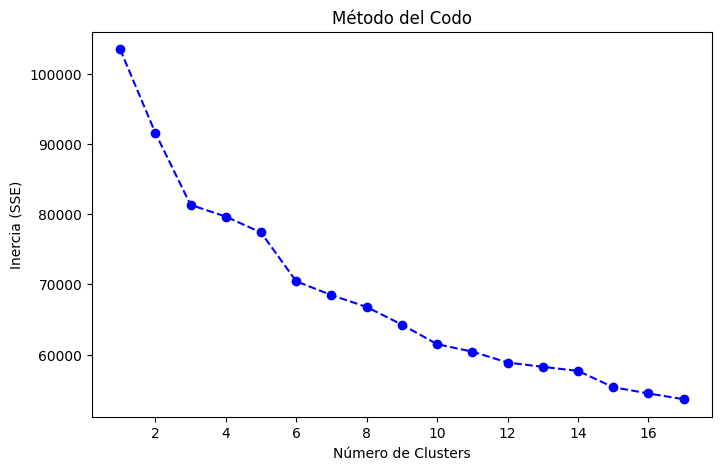

Mejores parámetros encontrados:
{'tol': 0.0001, 'n_init': 20, 'n_clusters': 13, 'max_iter': 1000, 'init': 'k-means++'}


KMeans(max_iter=1000, n_clusters=13, n_init=20, random_state=42)

In [ ]:
elbow_and_random_search(df_coded)

In [ ]:
from sklearn.cluster import KMeans

best_kmeans = KMeans(tol=0.0001, n_init=20, n_clusters=4, max_iter=1000, init='k-means++') # Modelo
clusters_kmeans = best_kmeans.fit_predict(df_coded) # Predicciones

### Evaluación

Haremos uso de 3 métricas diferentes:

Aquí tienes una lista de **algoritmos de clustering** y una selección de **métricas para evaluar su rendimiento**, junto con la interpretación de sus valores:

#### **1. Silhouette Score**
   - **Definición:** Mide qué tan similar es un punto a su propio cluster en comparación con otros clusters.
   - **Rango:** \([-1, 1]\)
   - **Interpretación:**
     - \(1\): Cluster bien definido.
     - \(0\): Punto en el límite entre dos clusters.
     - \(-1\): Punto mal asignado.

#### **2. Davies-Bouldin Index**
   - **Definición:** Mide la compactación y separación de los clusters.
   - **Rango:** \( [0, infinito) \)
   - **Interpretación:**
     - Valores más bajos indican clusters mejor separados y compactos.

#### **3. Calinski-Harabasz Index (Variance Ratio Criterion)**
   - **Definición:** Mide la dispersión entre clusters y dentro de clusters.
   - **Rango:** Sin límite.
   - **Interpretación:**
     - Valores más altos indican una mejor separación entre clusters.

In [ ]:
# Evaluar métricas para el conjunto
metrics_kmeans = evaluate_clustering(best_kmeans, df_coded)
print("Métricas para K-Means:", metrics_kmeans)

Métricas para K-Means: {'Silhouette Score': 0.15671919929578973, 'Calinski-Harabasz Index': 1890.239169151882, 'Davies-Bouldin Index': 2.195937605767683}


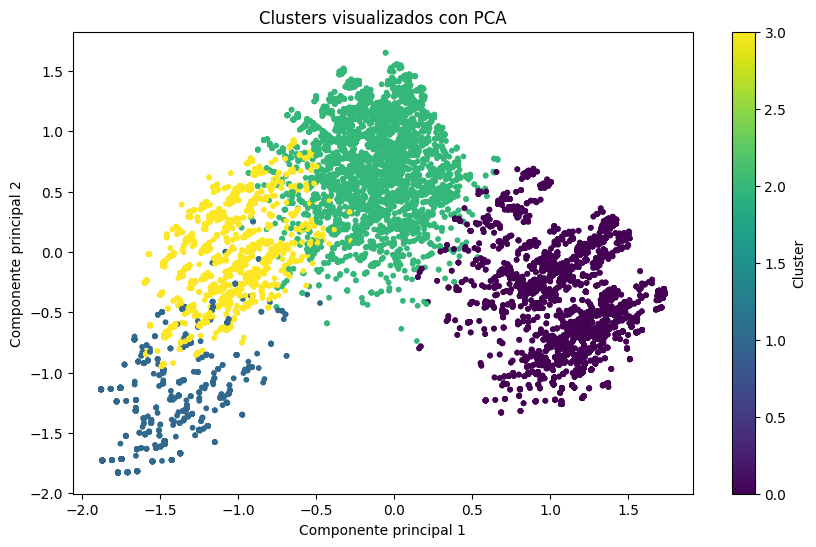

In [ ]:
# Visualizar
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reducir dimensiones a 2D para visualización
pca = PCA(n_components=2)
data_pca = pca.fit_transform(df_coded.iloc[:, :-1])
labels = best_kmeans.fit_predict(df_coded.iloc[:, :-1])

# Graficar los clusters
plt.figure(figsize=(10, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='viridis', s=10)
plt.title('Clusters visualizados con PCA')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.colorbar(label='Cluster')
plt.show()


## Entrenar el algoritmo con DBSCAN

### Entrenamiento

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Parámetros a probar para DBSCAN
param_dist = {
    'eps': [0.1, 0.2, 0.3, 0.4, 0.5],  # Distancia máxima entre puntos para ser considerados vecinos
    'min_samples': [3, 5, 10, 15],      # Número mínimo de puntos para formar un cluster
}

# Modelo base
dbscan = DBSCAN()

# Búsqueda aleatoria
search = RandomizedSearchCV(dbscan, param_distributions=param_dist, n_iter=20, scoring=scorer, cv=3)
search.fit(df_coded)

best_dbscan = search.best_estimator_ # Modelo
clusters_dbscan = best_dbscan.fit_predict(df_coded) # Prediccion

print("Mejores hiperparámetros:", search.best_params_)

Mejores hiperparámetros: {'min_samples': 3, 'eps': 0.1}


### Evaluacion

In [ ]:
# Evaluar métricas
metrics_dbscan = evaluate_clustering(best_dbscan, df_coded)
print("Métricas para DBSCAN:", metrics_dbscan)

Métricas para DBSCAN: {'Silhouette Score': 0.5708948489127438, 'Calinski-Harabasz Index': 31.773203212944722, 'Davies-Bouldin Index': 1.0110735698232023}


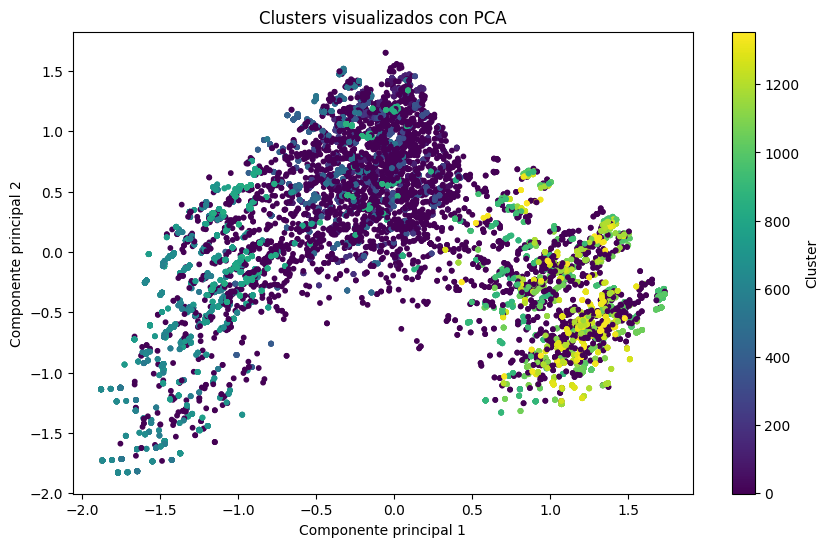

In [ ]:
# Visualizar
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reducir dimensiones a 2D para visualización
pca = PCA(n_components=2)
data_pca = pca.fit_transform(df_coded.iloc[:, :-1])
labels = best_dbscan.fit_predict(df_coded.iloc[:, :-1])

# Graficar los clusters
plt.figure(figsize=(10, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='viridis', s=10)
plt.title('Clusters visualizados con PCA')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.colorbar(label='Cluster')
plt.show()

## Generar el DF con los datos originales y los clusters generados por el algoritmo escogido

Escogeremos el modelo de clustering con 4 clusters generado por KMEANS

In [ ]:
# Unir clusters con df
df_clustering = df_mod.copy()
df_clustering['Cluster'] = clusters_kmeans
df_clustering

,Show,Total Boletos,Nombre Localidad,Forma de Pago,Estado de Pago,EsCompartido,TipoShow,Mes,Día,Periodo,Mes_Show,Día_Show,Periodo_Show,Cluster
0,TARDE CLIPP,1,SALA 3,Wallet,1,1,Otro,Enero,Jueves,Tarde,Marzo,Viernes,Tarde,3
1,TARDE CLIPP,2,SALA 3,Wallet,1,0,Otro,Enero,Jueves,Tarde,Marzo,Viernes,Tarde,3
2,TARDE CLIPP,1,SALA 3,Wallet,1,1,Otro,Enero,Jueves,Tarde,Marzo,Viernes,Tarde,3
3,TARDE CLIPP,1,SALA 3,Wallet,1,1,Otro,Enero,Jueves,Tarde,Marzo,Viernes,Tarde,3
4,TARDE CLIPP,1,SALA 3,Wallet,1,1,Otro,Enero,Jueves,Tarde,Marzo,Viernes,Tarde,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15984,Anemoi,2,PALCO,AppExterna,1,0,Teatro,Noviembre,Viernes,Tarde,Noviembre,Jueves,Noche,1
15985,Cuarteto de Saxofon y Sinfonica Philip Glass,2,PLATEA MEDIA,AppExterna,1,1,Concierto,Noviembre,Viernes,Tarde,Noviembre,Viernes,Noche,1
15986,Un hombre muerto a puntapies,2,PLATEA BAJA,AppExterna,1,0,Teatro,Noviembre,Viernes,Tarde,Noviembre,Lunes,Noche,1
15987,A pebble falling on a silent lake,2,PLATEA MEDIA,AppExterna,1,0,Teatro,Noviembre,Viernes,Tarde,Noviembre,Sábado,Noche,1


In [ ]:
# Guardar el nuevo CSV generado
df_clustering.to_csv('data_with_clusters.csv', index=False)

In [ ]:
# Guardar el modelo entrenado
import joblib

# Guardar el modelo KMeans entrenado en un archivo
joblib.dump(best_kmeans, 'kmeans_model.pkl')

['kmeans_model.pkl']

## Algoritmo predictor con arbol de desicion

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Preparar las características (X) y las etiquetas (y)
X = df_coded  # Características originales
y = df_clustering['Cluster']  # Etiquetas de los clusters

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el clasificador
classifier = DecisionTreeClassifier(random_state=42)

# Entrenar el clasificador
classifier.fit(X_train, y_train)

# Predecir los clusters para el conjunto de prueba
y_pred = classifier.predict(X_test)

# Evaluar la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del clasificador: {accuracy}')

Precisión del clasificador: 0.9987492182614134
